In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten , Dropout
from tensorflow.keras.models import Model
# from tensorflow.keras.applications.resnet import ResNet50
from keras.applications.vgg19 import VGG19
# from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = '/kaggle/input/train-n'
valid_path = '/kaggle/input/test-n'

In [3]:
# add preprocessing layer to the front of VGG
r = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


80134624/80134624 [==============================] - 1s 0us/step


In [4]:
# don't train existing weights
for layer in r.layers:
  layer.trainable = False
  

In [5]:
  # useful for getting number of classes
folders = glob('/kaggle/input/train-n/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(r.output)
# x = Dense(256, activation='relu')(x)
# x = Dropout(0.2)(x)
# x = Dense(256, activation='relu')(x)
# x = Dense(64, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# create a model object
model = Model(inputs=r.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/kaggle/input/train-n',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/kaggle/input/test-n',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 3706 images belonging to 4 classes.
Found 748 images belonging to 4 classes.


In [10]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
116/116 [==============================] - 77s 543ms/step - loss: 1.3445 - accuracy: 0.4962 - val_loss: 1.2342 - val_accuracy: 0.5201
Epoch 2/10
116/116 [==============================] - 49s 423ms/step - loss: 0.8614 - accuracy: 0.6560 - val_loss: 1.2071 - val_accuracy: 0.5455
Epoch 3/10
116/116 [==============================] - 50s 427ms/step - loss: 0.8252 - accuracy: 0.6692 - val_loss: 1.0919 - val_accuracy: 0.5936
Epoch 4/10
116/116 [==============================] - 50s 434ms/step - loss: 0.7573 - accuracy: 0.7035 - val_loss: 1.4887 - val_accuracy: 0.5495
Epoch 5/10
116/116 [==============================] - 49s 425ms/step - loss: 0.6890 - accuracy: 0.7275 - val_loss: 1.1734 - val_accuracy: 0.6136
Epoch 6/10
116/116 [==============================] - 51s 436ms/step - loss: 0.6695 - accuracy: 0.7326 - val_loss: 1.2376 - val_accuracy: 0.5936
Epoch 7/10
116/116 [==============================] - 51s 442ms/step - loss: 0.6419 - accuracy: 0.7472 - val_loss: 1.6086 - val_ac

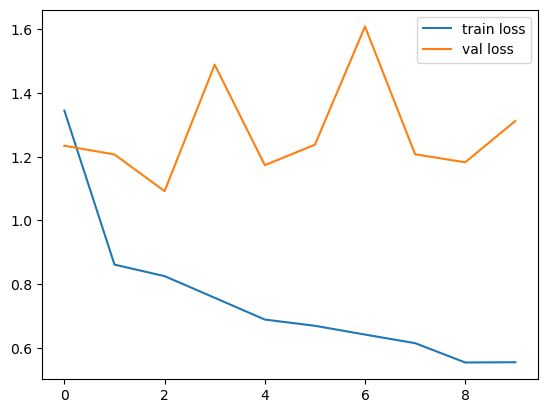

<Figure size 640x480 with 0 Axes>

In [11]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

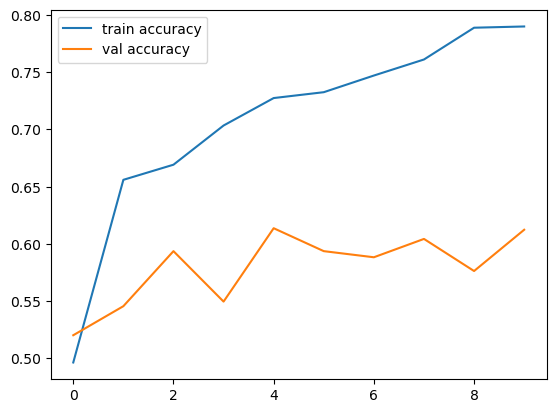

<Figure size 640x480 with 0 Axes>

In [12]:
# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [13]:
import tensorflow as tf
from keras.models import load_model
model.save('model1.h5')